# The Scenario

Imagine you've just finished the Springboard Data Science Career Track course, and have been hired by a rising popular specialty coffee company - RR Diner Coffee - as a data scientist. Congratulations!

RR Diner Coffee sells two types of thing:
- specialty coffee beans, in bulk (by the kilogram only) 
- coffee equipment and merchandise (grinders, brewing equipment, mugs, books, t-shirts).

RR Diner Coffee has three stores, two in Europe and one in the USA. The flagshap store is in the USA, and everything is quality assessed there, before being shipped out. Customers further away from the USA flagship store have higher shipping charges. 

You've been taken on at RR Diner Coffee because the company are turning towards using data science and machine learning to systematically make decisions about which coffee farmers they should strike deals with. 

RR Diner Coffee typically buys coffee from farmers, processes it on site, brings it back to the USA, roasts it, packages it, markets it, and ships it (only in bulk, and after quality assurance) to customers internationally. These customers all own coffee shops in major cities like New York, Paris, London, Hong Kong, Tokyo, and Berlin. 

Now, RR Diner Coffee has a decision about whether to strike a deal with a legendary coffee farm (known as the **Hidden Farm**) in rural China: there are rumours their coffee tastes of lychee and dark chocolate, while also being as sweet as apple juice. 

It's a risky decision, as the deal will be expensive, and the coffee might not be bought by customers. The stakes are high: times are tough, stocks are low, farmers are reverting to old deals with the larger enterprises and the publicity of selling *Hidden Farm* coffee could save the RR Diner Coffee business. 

Your first job, then, is ***to build a decision tree to predict how many units of the Hidden Farm Chinese coffee will be purchased by RR Diner Coffee's most loyal customers.*** 

To this end, you and your team have conducted a survey of 710 of the most loyal RR Diner Coffee customers, collecting data on the customers':
- age
- gender 
- salary 
- whether they have bought at least one RR Diner Coffee product online
- their distance from the flagship store in the USA (standardized to a number between 0 and 11) 
- how much they spent on RR Diner Coffee products on the week of the survey 
- how much they spent on RR Diner Coffee products in the month preeding the survey
- the number of RR Diner coffee bean shipments each customer has ordered over the preceding year. 

You also asked each customer participating in the survey whether they would buy the Hidden Farm coffee, and some (but not all) of the customers gave responses to that question. 

You sit back and think: if more than 70% of the interviewed customers are likely to buy the Hidden Farm coffee, you will strike the deal with the local Hidden Farm farmers and sell the coffee. Otherwise, you won't strike the deal and the Hidden Farm coffee will remain in legends only. There's some doubt in your mind about whether 70% is a reasonable threshold, but it'll do for the moment. 

To solve the problem, then, you will build a decision tree to implement a classification solution. 


-------------------------------
As ever, this notebook is **tiered**, meaning you can elect that tier that is right for your confidence and skill level. There are 3 tiers, with tier 1 being the easiest and tier 3 being the hardest. This is ***tier 1***, so a gentle introduction to classification models using decision trees. 

**1. Sourcing and loading** 
- Import packages
- Load data
- Explore the data

 
**2. Cleaning, transforming and visualizing**
- Cleaning the data
- Train/test split
  
  
**3. Modelling** 
- Model 1: Entropy model - no max_depth
- Model 2: Gini impurity model - no max_depth
- Model 3: Entropy model - max depth 3
- Model 4: Gini impurity model - max depth 3


**4. Evaluating and concluding** 
- How many customers will buy Hidden Farm coffee?
- Decision

**5. Random Forest** 
- Import necessary modules
- Model
- Revise conclusion
    

# 0. Overview

This notebook uses decision trees to determine whether the factors of salary, gender, age, how much money the customer spent last week and during the preceding month on RR Diner Coffee products, how many kilogram coffee bags the customer bought over the last year, whether they have bought at least one RR Diner Coffee product online, and their distance from the flagship store in the USA, could predict whether customers would purchase the Hidden Farm coffee if a deal with its farmers were struck.

In [289]:
import re

import pandas as pd
import numpy as np
from sklearn import tree, metrics
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from io import StringIO  
from IPython.display import Image  
import pydotplus
import re

In [290]:
# Read in the data to a variable called coffeeData
coffeeData = pd.read_csv("data/RRDinerCoffeeData.csv")

As we've seen, exploration entails doing things like checking out the **initial appearance** of the data with head(), the **dimensions** of our data with .shape, the **data types** of the variables with .info(), the **number of non-null values**, how much **memory** is being used to store the data, and finally the major summary statistcs capturing **central tendancy, dispersion and the null-excluding shape of the dataset's distribution**. 

How much of this can you do yourself by this point in the course? Have a real go. 

In [291]:
print(coffeeData.shape)
print((coffeeData.head()))

(702, 9)
   Age  Gender  num_coffeeBags_per_year  spent_week  spent_month  SlrAY  \
0   36  Female                        0          24           73  42789   
1   24    Male                        0          44          164  74035   
2   24    Male                        0          39          119  30563   
3   20    Male                        0          30          107  13166   
4   24  Female                        0          20           36  14244   

   Distance  Online  Decision  
0  0.003168       0       1.0  
1  0.520906       0       NaN  
2  0.916005       1       1.0  
3  0.932098       1       NaN  
4  0.965881       0       1.0  


In [292]:
coffeeData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      702 non-null    int64  
 1   Gender                   702 non-null    object 
 2   num_coffeeBags_per_year  702 non-null    int64  
 3   spent_week               702 non-null    int64  
 4   spent_month              702 non-null    int64  
 5   SlrAY                    702 non-null    int64  
 6   Distance                 702 non-null    float64
 7   Online                   702 non-null    int64  
 8   Decision                 474 non-null    float64
dtypes: float64(2), int64(6), object(1)
memory usage: 49.5+ KB


In [293]:
print(f' [% missing in Decision is {1 - (474 / 702)}]')
print()
print(coffeeData.describe())

 [% missing in Decision is 0.32478632478632474]

              Age  num_coffeeBags_per_year  spent_week  spent_month  \
count  702.000000               702.000000  702.000000   702.000000   
mean    34.243590                 2.710826   32.853276   107.923077   
std     13.927945                 1.593629   15.731878    55.348485   
min     16.000000                 0.000000    0.000000     0.000000   
25%     23.000000                 1.000000   24.250000    62.000000   
50%     28.000000                 3.000000   36.000000   113.500000   
75%     46.000000                 4.000000   43.000000   150.750000   
max     90.000000                 5.000000   62.000000   210.000000   

               SlrAY    Distance      Online    Decision  
count     702.000000  702.000000  702.000000  474.000000  
mean    43819.843305    4.559186    0.531339    0.639241  
std     26192.626943    3.116275    0.499373    0.480728  
min      1617.000000    0.003168    0.000000    0.000000  
25%     22812.25

In [294]:
coffeeData.columns

Index(['Age', 'Gender', 'num_coffeeBags_per_year', 'spent_week', 'spent_month',
       'SlrAY', 'Distance', 'Online', 'Decision'],
      dtype='object')

In [295]:
coffeeData.rename(columns={'SlrAY': 'Salary', 'spent_week': 'spent_last_week', 'spent_month': 'spent_last_month'}, inplace=True)
coffeeData.columns

Index(['Age', 'Gender', 'num_coffeeBags_per_year', 'spent_last_week',
       'spent_last_month', 'Salary', 'Distance', 'Online', 'Decision'],
      dtype='object')

# 2. Cleaning, transforming and visualizing

In [296]:
# Let's have a closer look at the gender column. Its values need cleaning.
# Call describe() on the gender column 
coffeeData['Gender'].describe()

count      702
unique       9
top       Male
freq       355
Name: Gender, dtype: object

In [297]:
coffeeData['Gender']

0      Female
1        Male
2        Male
3        Male
4      Female
        ...  
697    Female
698      Male
699      Male
700    Female
701      Male
Name: Gender, Length: 702, dtype: object

In [298]:
regex_M = re.compile(r'^M.*', flags=re.IGNORECASE)
regex_F = re.compile(r'^F.*', flags=re.IGNORECASE)

coffeeData["Gender"] = coffeeData.Gender.str.replace(regex_M, r"Male", regex=True)

coffeeData["Gender"] = coffeeData.Gender.str.replace(regex_F, r"Female", regex=True)

In [299]:
# Check out the unique values of the column 'Decision':
coffeeData.Gender.unique()

array(['Female', 'Male'], dtype=object)

We now want to replace `1.0` and `0.0` in the `Decision` column by `YES` and `NO` respectively.

In [300]:
coffeeData.Decision = coffeeData.Decision.replace(1.0, "Yes")
coffeeData.Decision = coffeeData.Decision.replace(0.0, "No")
coffeeData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      702 non-null    int64  
 1   Gender                   702 non-null    object 
 2   num_coffeeBags_per_year  702 non-null    int64  
 3   spent_last_week          702 non-null    int64  
 4   spent_last_month         702 non-null    int64  
 5   Salary                   702 non-null    int64  
 6   Distance                 702 non-null    float64
 7   Online                   702 non-null    int64  
 8   Decision                 474 non-null    object 
dtypes: float64(1), int64(6), object(2)
memory usage: 49.5+ KB


In [301]:
coffeeData.Decision.unique()

array(['Yes', nan, 'No'], dtype=object)

## 2b. Train/test split

### 1. Drop all null values within the `Decision` column, and save the result as NoPrediction

In [302]:
# NoPrediction will contain all known values for the decision
# Call dropna() on coffeeData, and store the result in a variable NOPrediction 
# Call describe() on the Decision column of NoPrediction after calling dropna() on coffeeData
NOPrediction = coffeeData.dropna()
NOPrediction.Decision.describe()

count     474
unique      2
top       Yes
freq      303
Name: Decision, dtype: object

### 2. Visualize the data using scatter and boxplots of several variables in the y-axis and the decision on the x-axis

In [303]:
variable_list = coffeeData.columns.to_list()[:-1]

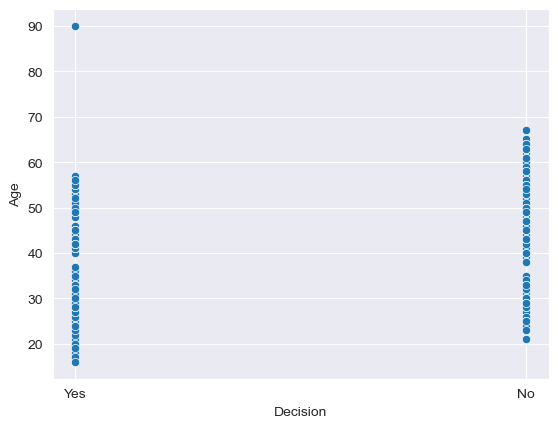

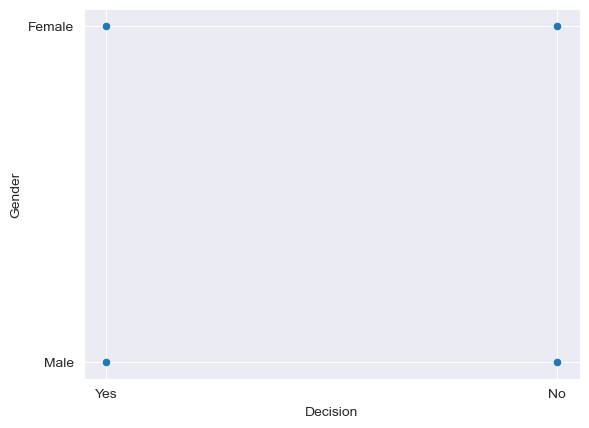

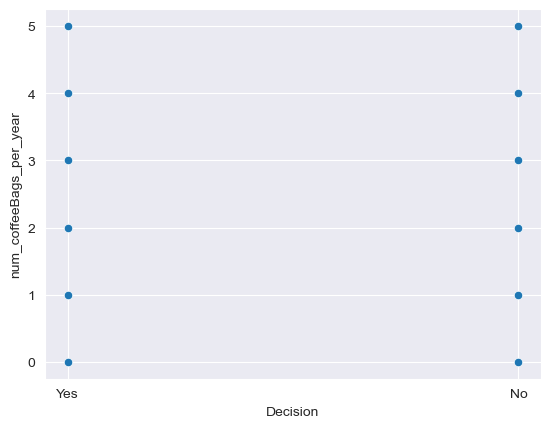

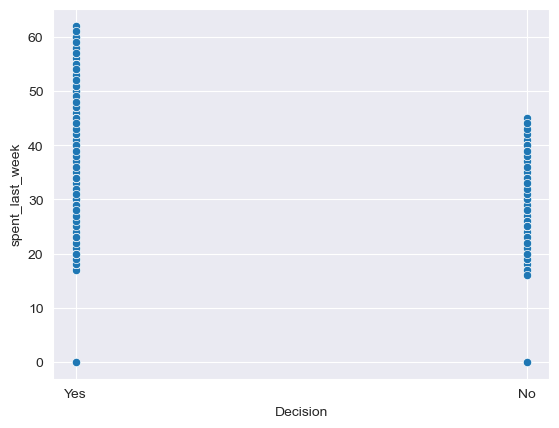

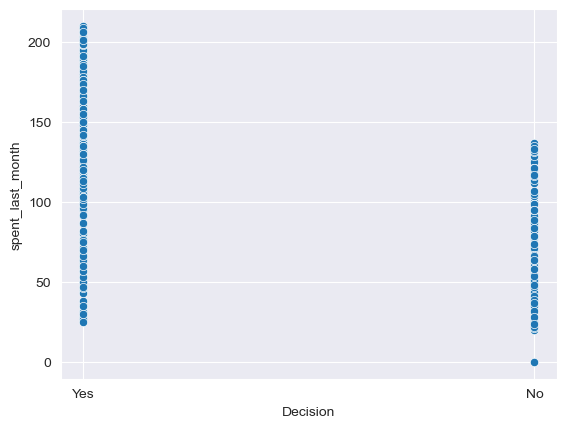

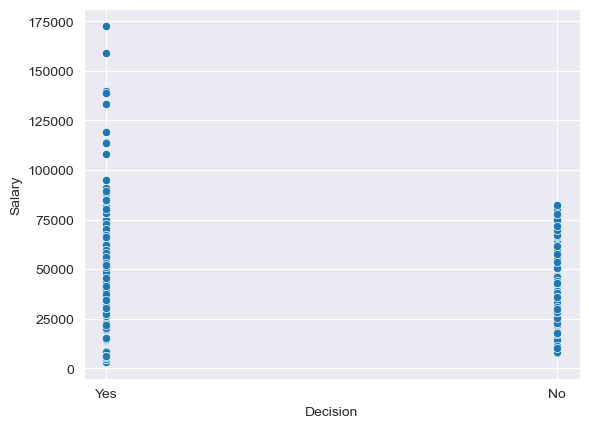

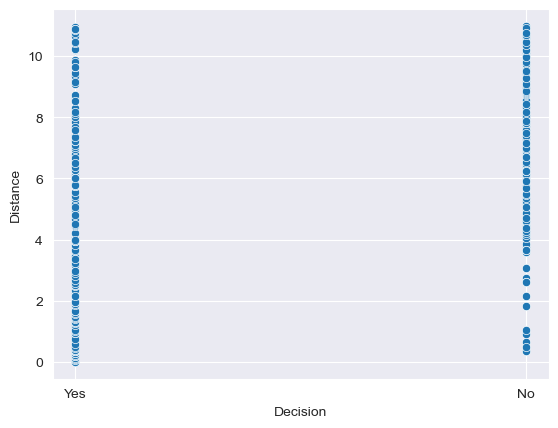

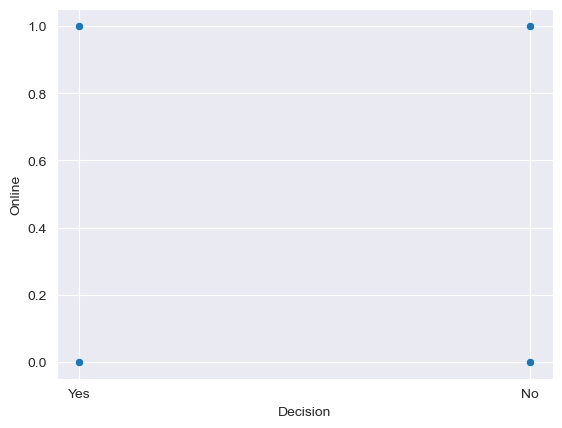

In [304]:
for v in variable_list:
    plt.xlabel("Decision")
    plt.ylabel(v)
    try:
        sns.scatterplot(data=NOPrediction, x='Decision', y=v)
        plt.show()
    except TypeError:
        continue


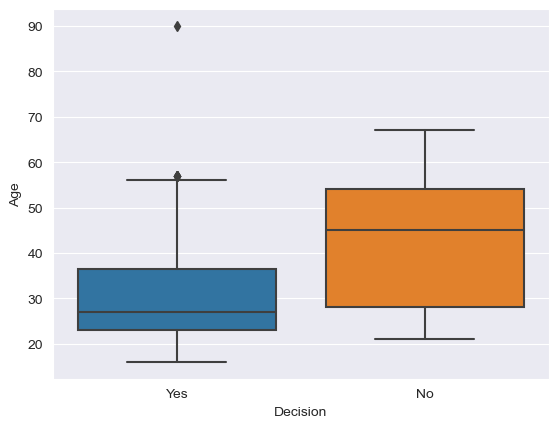

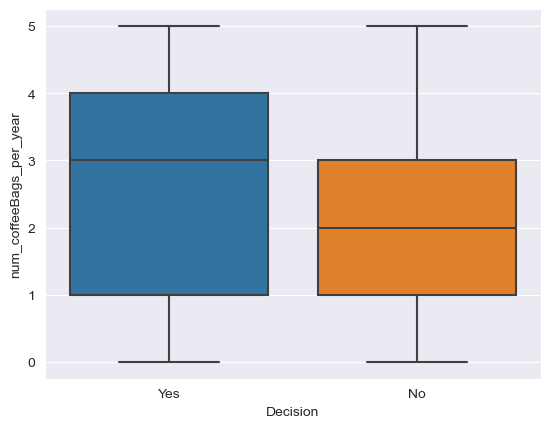

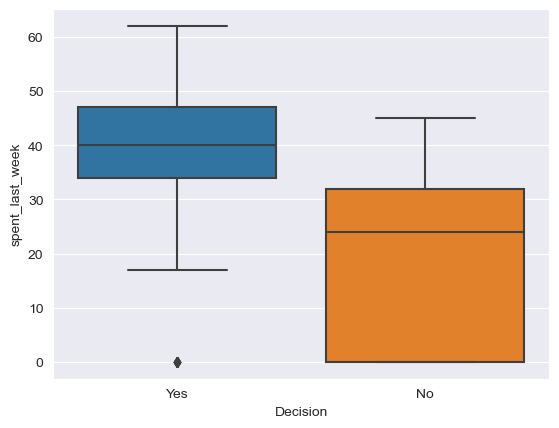

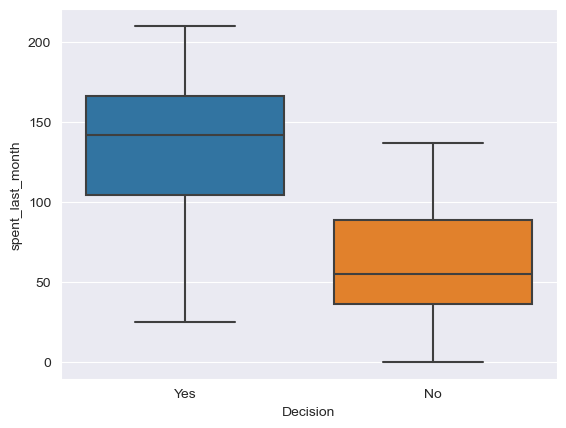

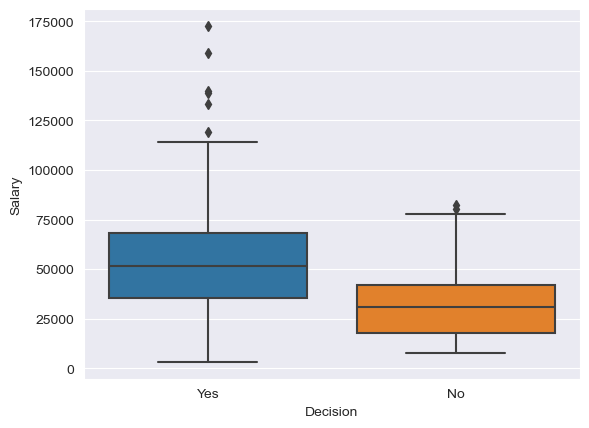

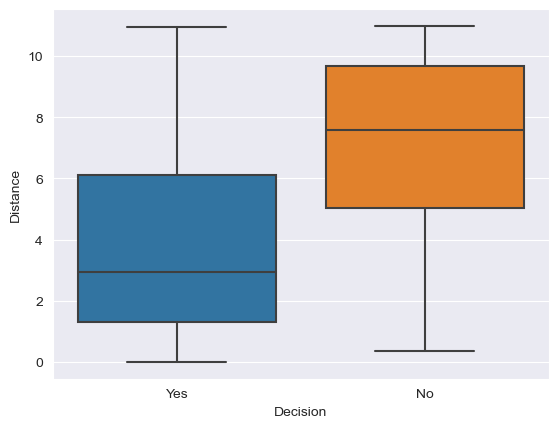

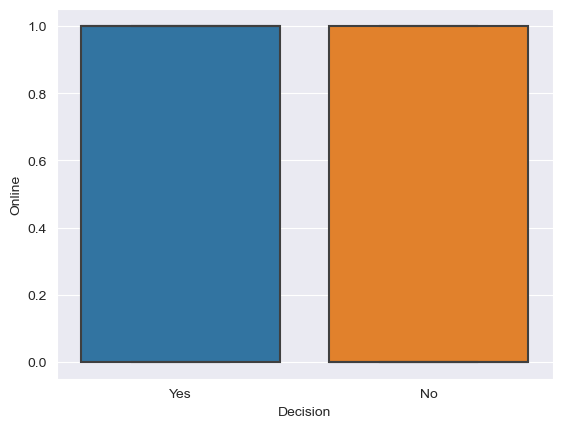

In [305]:
for v in variable_list:
    plt.xlabel("Decision")
    plt.ylabel(v)
    try:
        sns.boxplot(data=NOPrediction, x='Decision', y=v)
        plt.show()
    except TypeError:
        continue


Can you admissibly conclude anything from this boxplot? Write your answer here:

Customers who are younger, wealthier, closer to US store, and have spent money recently are more likely to buy the the new coffee.

Can you admissibly conclude anything from this scatterplot? Remember: we are trying to build a tree to classify unseen examples. Write your answer here:

while not your standard-looking scatterplot, the height and/or "apparent" number of points show similar information to the boxplots.

### 3. Get the subset of coffeeData with null values in the Decision column, and save that subset as Prediction

In [306]:
Prediction = coffeeData[coffeeData.Decision.isna()]
print(type(Prediction))
print(Prediction.describe())
print(Prediction.head())

<class 'pandas.core.frame.DataFrame'>
              Age  num_coffeeBags_per_year  spent_last_week  spent_last_month  \
count  228.000000               228.000000       228.000000        228.000000   
mean    31.802632                 2.960526        33.394737        110.407895   
std     14.302293                 1.585514        15.697930         53.786536   
min     16.000000                 0.000000         0.000000          0.000000   
25%     22.000000                 2.000000        25.750000         65.000000   
50%     25.000000                 3.000000        37.000000        113.500000   
75%     39.000000                 4.000000        44.000000        151.250000   
max     67.000000                 5.000000        62.000000        210.000000   

              Salary    Distance      Online  
count     228.000000  228.000000  228.000000  
mean    41923.741228    3.428836    0.570175  
std     27406.768360    2.153102    0.496140  
min      1617.000000    0.010048    0.000000

### 4. Divide the NOPrediction subset into X and y

In [307]:
# First of all, let's check the names of the columns of NOPrediction
NOPrediction.columns

Index(['Age', 'Gender', 'num_coffeeBags_per_year', 'spent_last_week',
       'spent_last_month', 'Salary', 'Distance', 'Online', 'Decision'],
      dtype='object')

In [308]:
# Make an explanatory variable called X, and assign it: NoPrediction[features]
X = NOPrediction[variable_list]

# Make a dependent variable called y, and assign it: NoPrediction.Decision
y = NOPrediction.Decision

print(X.columns)
print()
print(y.unique())

Index(['Age', 'Gender', 'num_coffeeBags_per_year', 'spent_last_week',
       'spent_last_month', 'Salary', 'Distance', 'Online'],
      dtype='object')

['Yes' 'No']


### 5. Create dummy variables to deal with categorical inputs
One-hot encoding replaces each unique value of a given column with a new column, and puts a 1 in the new column for a given row just if its initial value for the original column matches the new column. Check out [this resource](https://hackernoon.com/what-is-one-hot-encoding-why-and-when-do-you-have-to-use-it-e3c6186d008f) if you haven't seen one-hot-encoding before. 

**Note**: We will do this before we do our train/test split as to do it after could mean that some categories only end up in the train or test split of our data by chance and this would then lead to different shapes of data for our `X_train` and `X_test` which could/would cause downstream issues when fitting or predicting using a trained model.

In [309]:
NOPrediction.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 474 entries, 0 to 701
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      474 non-null    int64  
 1   Gender                   474 non-null    object 
 2   num_coffeeBags_per_year  474 non-null    int64  
 3   spent_last_week          474 non-null    int64  
 4   spent_last_month         474 non-null    int64  
 5   Salary                   474 non-null    int64  
 6   Distance                 474 non-null    float64
 7   Online                   474 non-null    int64  
 8   Decision                 474 non-null    object 
dtypes: float64(1), int64(6), object(2)
memory usage: 37.0+ KB


In [310]:
X = pd.get_dummies(X)
X.columns

Index(['Age', 'num_coffeeBags_per_year', 'spent_last_week', 'spent_last_month',
       'Salary', 'Distance', 'Online', 'Gender_Female', 'Gender_Male'],
      dtype='object')

### 6. Further divide those subsets into train and test subsets for X and y respectively: X_train, X_test, y_train, y_test

In [311]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size = 0.2, random_state = 1)

# 3. Modelling
It's useful to look at the scikit-learn documentation on decision trees https://scikit-learn.org/stable/modules/tree.html before launching into applying them. If you haven't seen them before, take a look at that link, in particular the section `1.10.5.` 

## Model 1: Entropy model - no max_depth

We'll give you a little more guidance here, as the Python is hard to deduce, and scikitlearn takes some getting used to.

Theoretically, let's remind ourselves of what's going on with a decision tree implementing an entropy model.

Ross Quinlan's **ID3 Algorithm** was one of the first, and one of the most basic, to use entropy as a metric.

**Entropy** is a measure of how uncertain we are about which category the data-points fall into at a given point in the tree. The **Information gain** of a specific feature with a threshold (such as 'spent_last_month <= 138.0') is the difference in entropy that exists before and after splitting on that feature; i.e., the information we gain about the categories of the data-points by splitting on that feature and that threshold. 

Naturally, we want to minimize entropy and maximize information gain. Quinlan's ID3 algorithm is designed to output a tree such that the features at each node, starting from the root, and going all the way down to the leaves, have maximial information gain. We want a tree whose leaves have elements that are *homogeneous*, that is, all of the same category. 

The first model will be the hardest. Persevere and you'll reap the rewards: you can use almost exactly the same code for the other models. 

In [312]:
entr_model = tree.DecisionTreeClassifier(criterion="entropy", random_state = 1)
entr_model.fit(X_train, y_train)
y_pred = entr_model.predict(X_test)
y_pred_entr_no_depth = pd.Series(y_pred)
y_pred_entr_no_depth.shape

(95,)

In [313]:
help(tree.export_graphviz)

Help on function export_graphviz in module sklearn.tree._export:

export_graphviz(decision_tree, out_file=None, *, max_depth=None, feature_names=None, class_names=None, label='all', filled=False, leaves_parallel=False, impurity=True, node_ids=False, proportion=False, rotate=False, rounded=False, special_characters=False, precision=3, fontname='helvetica')
    Export a decision tree in DOT format.
    
    This function generates a GraphViz representation of the decision tree,
    which is then written into `out_file`. Once exported, graphical renderings
    can be generated using, for example::
    
        $ dot -Tps tree.dot -o tree.ps      (PostScript format)
        $ dot -Tpng tree.dot -o tree.png    (PNG format)
    
    The sample counts that are shown are weighted with any sample_weights that
    might be present.
    
    Read more in the :ref:`User Guide <tree>`.
    
    Parameters
    ----------
    decision_tree : decision tree classifier
        The decision tree to be ex

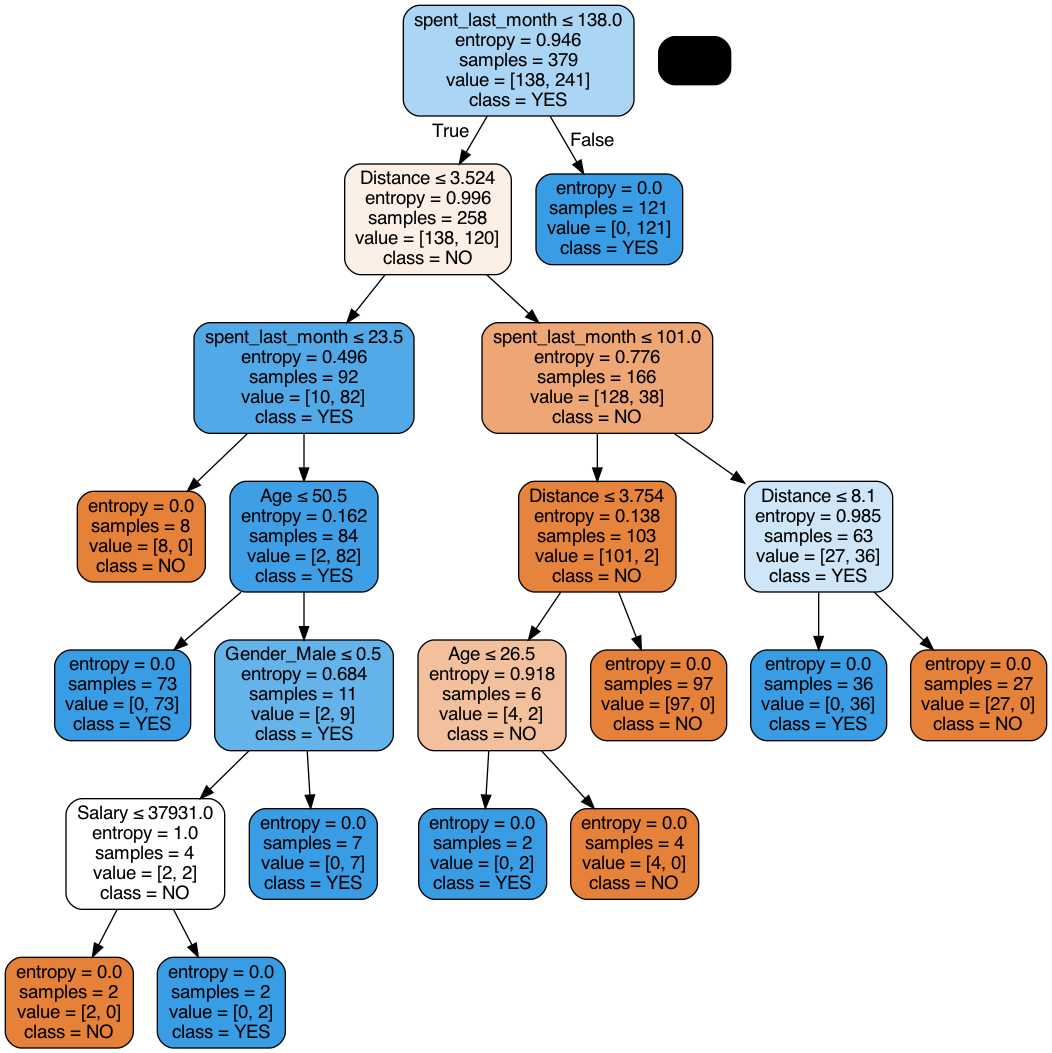

In [314]:
# Now we want to visualize the tree
dot_data = StringIO()

# We can do so with export_graphviz
tree.export_graphviz(entr_model, out_file=dot_data, filled=True, rounded=True,
                     special_characters=True,
                     feature_names=X_train.columns,class_names = ["NO", "YES"])

# Alternatively for class_names use entr_model.classes_
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

## Model 1: Entropy model - no max_depth: Interpretation and evaluation

In [315]:
# Run this block for model evaluation metrics
print("Model Entropy")
y_pred_entr_no_depth_confused = metrics.confusion_matrix(y_test,y_pred)
y_pred_entr_no_depth_classed = metrics.classification_report(y_test,y_pred)
print(y_pred_entr_no_depth_confused)
print(y_pred_entr_no_depth_classed)

Model Entropy
[[32  1]
 [ 1 61]]
              precision    recall  f1-score   support

          No       0.97      0.97      0.97        33
         Yes       0.98      0.98      0.98        62

    accuracy                           0.98        95
   macro avg       0.98      0.98      0.98        95
weighted avg       0.98      0.98      0.98        95



What can you infer from these results? Write your conclusions here: This model crushed it. just one false positive and one false negative. That's accurate and makes me remember when things are too good to be true, they probably are. Looks like low bias, but overfit?

## Model 2: Gini impurity model - no max_depth

Gini impurity, like entropy, is a measure of how well a given feature (and threshold) splits the data into categories.

Their equations are similar, but Gini impurity doesn't require logorathmic functions, which can be computationally expensive. 

In [316]:
gini_model = tree.DecisionTreeClassifier(criterion="gini", random_state = 1)
gini_model.fit(X_train, y_train)
y_pred = gini_model.predict(X_test)
y_pred_gini = pd.Series(y_pred)
y_pred_gini

0     Yes
1      No
2     Yes
3      No
4     Yes
     ... 
90    Yes
91     No
92    Yes
93     No
94    Yes
Length: 95, dtype: object

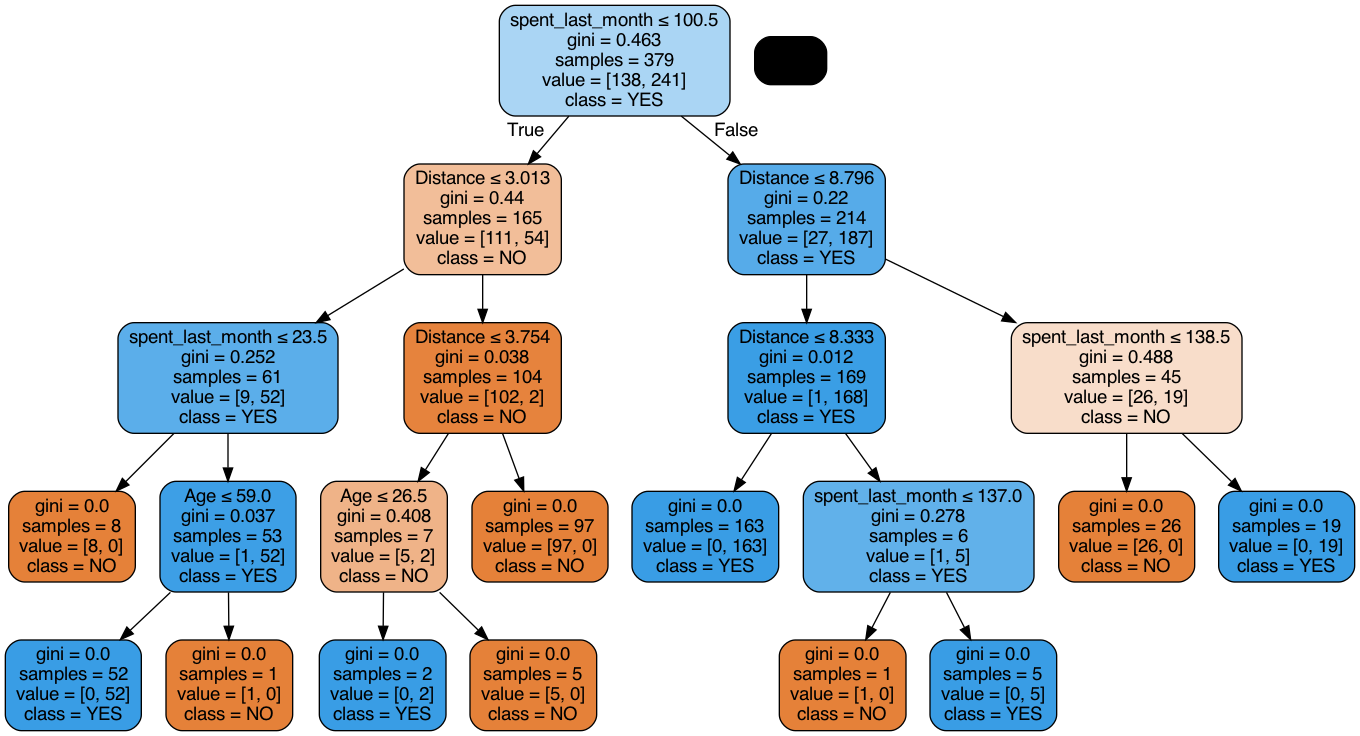

In [317]:
# As before, but make the model name gini_model
dot_data = StringIO()
tree.export_graphviz (gini_model, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True, feature_names=X_train.columns, class_names = ["NO", "YES"])

# Alternatively for class_names use gini_model.classes_
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [318]:
# Run this block for model evaluation
print("Model Gini impurity model")
y_pred_y_pred_gini_confused = metrics.confusion_matrix(y_test,y_pred)
y_pred_gini_classed = metrics.classification_report(y_test,y_pred)
print(y_pred_y_pred_gini_confused)
print(y_pred_gini_classed)

Model Gini impurity model
[[31  2]
 [ 1 61]]
              precision    recall  f1-score   support

          No       0.97      0.94      0.95        33
         Yes       0.97      0.98      0.98        62

    accuracy                           0.97        95
   macro avg       0.97      0.96      0.96        95
weighted avg       0.97      0.97      0.97        95



How do the results here compare to the previous model? Write your judgements here: Entropy was better

## Model 3: Entropy model - max depth 3
We're going to try to limit the depth of our decision tree, using entropy first.  

As you know, we need to strike a balance with tree depth. 

Insufficiently deep, and we're not giving the tree the opportunity to spot the right patterns in the training data.

Excessively deep, and we're probably going to make a tree that overfits to the training data, at the cost of very high error on the (hitherto unseen) test data. 

Sophisticated data scientists use methods like random search with cross-validation to systematically find a good depth for their tree. We'll start with picking 3, and see how that goes. 

In [319]:
# Made a model as before, but call it entr_model2, and make the max_depth parameter equal to 3. 
# Execute the fitting, predicting, and Series operations as before
entr_model2 = tree.DecisionTreeClassifier(criterion="entropy", max_depth = 3, random_state = 1)
entr_model2.fit(X_train, y_train)
y_pred = entr_model2.predict(X_test)
y_pred_entr_depth_3 = pd.Series(y_pred)
y_pred_entr_depth_3

0     Yes
1      No
2     Yes
3      No
4     Yes
     ... 
90    Yes
91     No
92    Yes
93     No
94    Yes
Length: 95, dtype: object

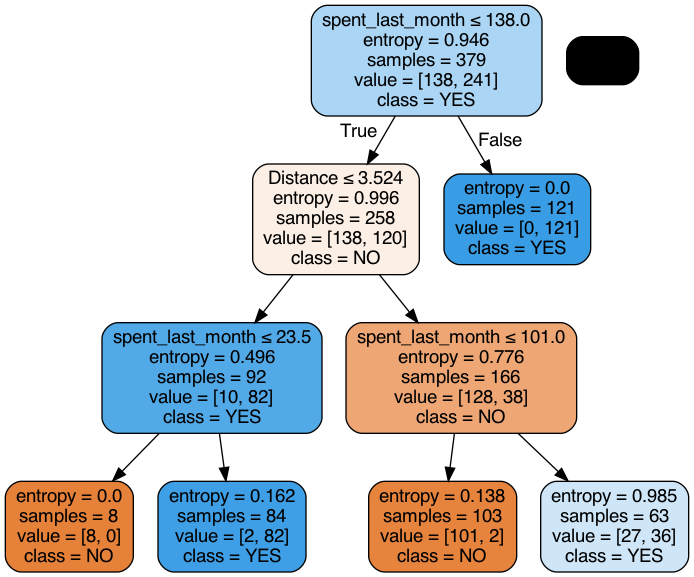

In [320]:
# As before, we need to visualize the tree to grasp its nature
dot_data = StringIO()
tree.export_graphviz(entr_model2, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names=X_train.columns,class_names = ["NO", "YES"])

# Alternatively for class_names use entr_model2.classes_
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [322]:
# Run this block for model evaluation 
print("Model Entropy model max depth 3")
y_pred_entr_depth_3_confused = metrics.confusion_matrix(y_test,y_pred)
y_pred_entr_depth_3_gini_classed = metrics.classification_report(y_test,y_pred)
print(y_pred_entr_depth_3_confused)
print(y_pred_entr_depth_3_gini_classed)

Model Entropy model max depth 3
[[28  5]
 [ 1 61]]
              precision    recall  f1-score   support

          No       0.97      0.85      0.90        33
         Yes       0.92      0.98      0.95        62

    accuracy                           0.94        95
   macro avg       0.94      0.92      0.93        95
weighted avg       0.94      0.94      0.94        95



So our accuracy decreased, but is this certainly an inferior tree to the max depth original tree we did with Model 1? Write your conclusions here: Getting worse

## Model 4: Gini impurity  model - max depth 3
We're now going to try the same with the Gini impurity model. 

In [323]:
# As before, make a variable, but call it gini_model2, and ensure the max_depth parameter is set to 3
gini_model2 =  tree.DecisionTreeClassifier(criterion='gini', random_state = 1, max_depth = 3)

# Do the fit, predict, and series transformations as before. 
gini_model2.fit(X_train, y_train)
y_pred = gini_model2.predict(X_test)
y_pred_gini_depth_3 = pd.Series(y_pred)
y_pred_gini_depth_3

0     Yes
1      No
2     Yes
3      No
4     Yes
     ... 
90    Yes
91     No
92    Yes
93     No
94    Yes
Length: 95, dtype: object

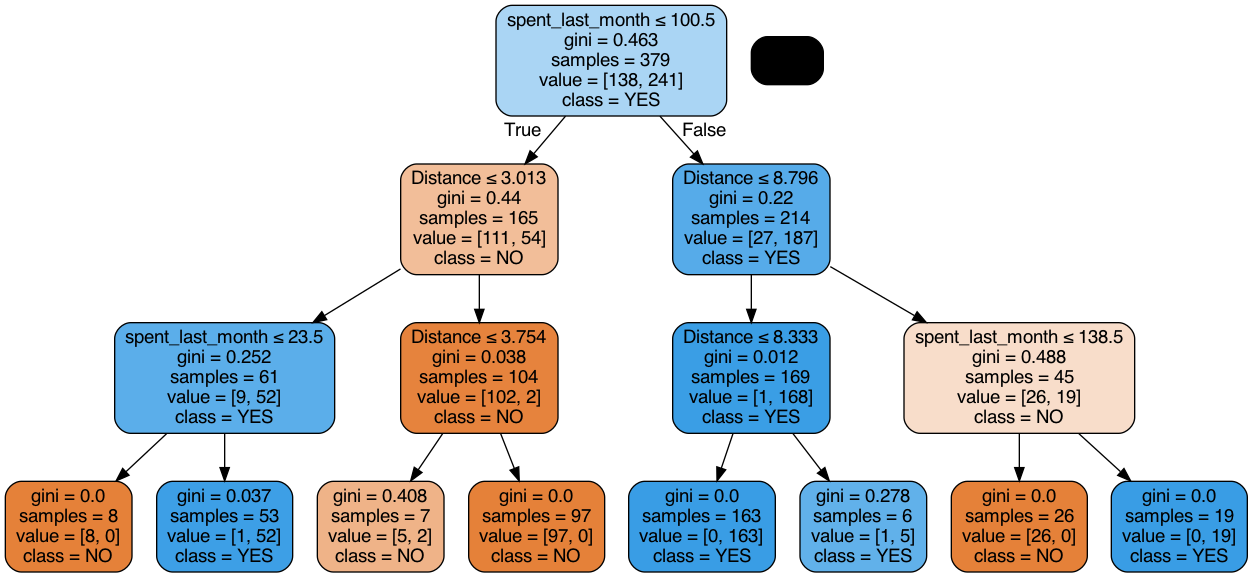

In [324]:
dot_data = StringIO()
tree.export_graphviz(gini_model2, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True, feature_names=X_train.columns,class_names = ["NO", "YES"])

# Alternatively for class_names use gini_model2.classes_
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [325]:
y_pred_gini_depth_3_confused = metrics.confusion_matrix(y_test,y_pred)
y_pred_gini_depth_3_gini_classed = metrics.classification_report(y_test,y_pred)
print(y_pred_gini_depth_3_confused)
print(y_pred_gini_depth_3_gini_classed)

[[31  2]
 [ 1 61]]
              precision    recall  f1-score   support

          No       0.97      0.94      0.95        33
         Yes       0.97      0.98      0.98        62

    accuracy                           0.97        95
   macro avg       0.97      0.96      0.96        95
weighted avg       0.97      0.97      0.97        95



In [326]:
print(f' No depth entropy confusion matrix:\n{y_pred_entr_no_depth_confused}\n\n')
print(f' No depth entropy classification report:\n{y_pred_entr_no_depth_classed}\n')
print('================================================================================================================================')
print(f'Depth 3 gini confusion matrix:\n{y_pred_gini_depth_3_confused}\n\n')
print(f'Depth 3 gini classification report:\n{y_pred_gini_depth_3_gini_classed}')

 No depth entropy confusion matrix:
[[32  1]
 [ 1 61]]


 No depth entropy classification report:
              precision    recall  f1-score   support

          No       0.97      0.97      0.97        33
         Yes       0.98      0.98      0.98        62

    accuracy                           0.98        95
   macro avg       0.98      0.98      0.98        95
weighted avg       0.98      0.98      0.98        95


Depth 3 gini confusion matrix:
[[31  2]
 [ 1 61]]


Depth 3 gini classification report:
              precision    recall  f1-score   support

          No       0.97      0.94      0.95        33
         Yes       0.97      0.98      0.98        62

    accuracy                           0.97        95
   macro avg       0.97      0.96      0.96        95
weighted avg       0.97      0.97      0.97        95



##Now this is an elegant tree. Its accuracy might not be the highest, but it's still the best model we've produced so far. Why is that? Write your answer here:

Model 1 was a full point more accurate. And precision and recall were higher. I owuld have gone with model 1. I'm not seeing any reason to choose gini depth 3 unless computation time is the issue. If time is a factor to stakeholders or CPU/GPU train time, the gini depth 3 is the way to go becuase the difference in the two models is negligible.

In [327]:
for_fun = pd.DataFrame([y_pred_entr_no_depth, y_pred_entr_depth_3, y_pred_gini, y_pred_gini_depth_3]).transpose()
for_fun.columns = ['y_pred_entr_no_depth', 'y_pred_entr_depth_3', 'y_pred_gini', 'y_pred_gini_depth_3']
for_fun.head()

,y_pred_entr_no_depth,y_pred_entr_depth_3,y_pred_gini,y_pred_gini_depth_3
0,Yes,Yes,Yes,Yes
1,No,No,No,No
2,Yes,Yes,Yes,Yes
3,No,No,No,No
4,Yes,Yes,Yes,Yes


# 4. Evaluating and concluding
## 4a. How many customers will buy Hidden Farm coffee? 
Let's first ascertain how many loyal customers claimed, in the survey, that they will purchase the Hidden Farm coffee. 

In [328]:
coffeeData["Decision"].value_counts()

Yes    303
No     171
Name: Decision, dtype: int64

In [329]:
303/(303+171)

0.6392405063291139

My intuition.
Don't switch if there is a higher costs associated with it.
WIll 13% stop ordering coffee if we don't switch?
NO.
It was just a seemingly innocuous question in a survey that people chose to take. People choosing to take a survey are likely dedicated cistomers.

Let's now determine the number of people that, according to the model, will be willing to buy the Hidden Farm coffee. 
1. First we subset the Prediction dataset into `new_X` considering all the variables except `Decision` 
2. Use that dataset to predict a new variable called `potential_buyers`

In [330]:
Prediction.columns

Index(['Age', 'Gender', 'num_coffeeBags_per_year', 'spent_last_week',
       'spent_last_month', 'Salary', 'Distance', 'Online', 'Decision'],
      dtype='object')

In [331]:
variable_list

['Age',
 'Gender',
 'num_coffeeBags_per_year',
 'spent_last_week',
 'spent_last_month',
 'Salary',
 'Distance',
 'Online']

In [332]:
new_X = Prediction[variable_list]
new_X.columns

Index(['Age', 'Gender', 'num_coffeeBags_per_year', 'spent_last_week',
       'spent_last_month', 'Salary', 'Distance', 'Online'],
      dtype='object')

In [333]:
# Call get_dummies() on the Pandas object pd, with new_X plugged in, to one-hot encode all features in the training set
new_X = pd.get_dummies(new_X)

# Make a variable called potential_buyers, and assign it the result of calling predict() on a model of your choice; 
# don't forget to pass new_X to predict()
potential_buyers = gini_model2.predict(new_X)

In [334]:
# Let's get the numbers of YES's and NO's in the potential buyers 
# Call unique() on np, and pass potential_buyers and return_counts=True 
np.unique(potential_buyers, return_counts=True)

(array(['No', 'Yes'], dtype=object), array([ 51, 177]))

The total number of potential buyers is 303 + 183 = 486

In [335]:
# Print the total number of surveyed people 
print("The total number of surveyed people was", coffeeData.Salary.count())

The total number of surveyed people was 702


In [336]:
# Let's calculate the proportion of buyers
486/702

0.6923076923076923

In [337]:
# Print the percentage of people who want to buy the Hidden Farm coffee, by our model 
print("Only ", round((486/702)*100, 2), "% of people want to buy the Hidden Farm coffee." )

Only  69.23 % of people want to buy the Hidden Farm coffee.


## 4b. Decision
Remember how you thought at the start: if more than 70% of the interviewed customers are likely to buy the Hidden Farm coffee, you will strike the deal with the local Hidden Farm farmers and sell the coffee. Otherwise, you won't strike the deal and the Hidden Farm coffee will remain in legends only. Well now's crunch time. Are you going to go ahead with that idea? If so, you won't be striking the deal with the Chinese farmers. 

They're called `decision trees`, aren't they? So where's the decision? What should you do? (Cue existential cat emoji). 

Ultimately, though, we can't write an algorithm to actually *make the business decision* for us. This is because such decisions depend on our values, what risks we are willing to take, the stakes of our decisions, and how important it us for us to *know* that we will succeed. What are you going to do with the models you've made? Are you going to risk everything, strike the deal with the *Hidden Farm* farmers, and sell the coffee? 

The philosopher of language Jason Stanley once wrote that the number of doubts our evidence has to rule out in order for us to know a given proposition depends on our stakes: the higher our stakes, the more doubts our evidence has to rule out, and therefore the harder it is for us to know things. We can end up paralyzed in predicaments; sometimes, we can act to better our situation only if we already know certain things, which we can only if our stakes were lower and we'd *already* bettered our situation. 

Data science and machine learning can't solve such problems. But what it can do is help us make great use of our data to help *inform* our decisions.

## 5. Random Forest
You might have noticed an important fact about decision trees. Each time we run a given decision tree algorithm to make a prediction (such as whether customers will buy the Hidden Farm coffee) we will actually get a slightly different result. This might seem weird, but it has a simple explanation: machine learning algorithms are by definition ***stochastic***, in that their output is at least partly determined by randomness. 

To account for this variability and ensure that we get the most accurate prediction, we might want to actually make lots of decision trees, and get a value that captures the centre or average of the outputs of those trees. Luckily, there's a method for this, known as the ***Random Forest***. 

Essentially, Random Forest involves making lots of trees with similar properties, and then performing summary statistics on the outputs of those trees to reach that central value. Random forests are hugely powerful classifers, and they can improve predictive accuracy and control over-fitting. 

Why not try to inform your decision with random forest? You'll need to make use of the RandomForestClassifier function within the sklearn.ensemble module, found [here](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html). 

### 5a. Import necessary modules

In [338]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

### 5b. Model
You'll use your X_train and y_train variables just as before.

You'll then need to make a variable (call it firstRFModel) to store your new Random Forest model. You'll assign this variable the result of calling RandomForestClassifier().

Then, just as before, you'll call fit() on that firstRFModel variable, and plug in X_train and y_train.

Finally, you should make a variable called y_pred, and assign it the result of calling the predict() method on your new firstRFModel, with the X_test data passed to it. 

In [339]:
# Plug in appropriate max_depth and random_state parameters 
firstRFModel = RandomForestClassifier(max_depth= 3, random_state= 1)
firstRFModel.fit(X_train, y_train)
pred_randoms = firstRFModel.predict(X_test)
print(metrics.confusion_matrix(y_test, pred_randoms))
print(metrics.classification_report(y_test, pred_randoms))

[[29  4]
 [ 1 61]]
              precision    recall  f1-score   support

          No       0.97      0.88      0.92        33
         Yes       0.94      0.98      0.96        62

    accuracy                           0.95        95
   macro avg       0.95      0.93      0.94        95
weighted avg       0.95      0.95      0.95        95



### 5c. Revise conclusion

Has your conclusion changed? Or is the result of executing random forest the same as your best model reached by a single decision tree?

The average of the trees is slightly less than model 4 when looking at position in (1, 2) in the confusion matrix. I believe that's false positives.
My opinion did change.
